# 1. Sử dụng code tự viết

In [59]:
import random
import matplotlib.pyplot as plt

def generate_random_value():
    return random.randint(0, 1)

def compute_fitness(individual):
    return sum(individual)

def create_individual(n):
    return [generate_random_value() \
                for _ in range(n)]

def crossover(ind1, ind2, rate=0.9):
    ind1_new = ind1.copy()
    ind2_new = ind2.copy()
    for i in range(len(ind1)):
        if random.random() < rate:
            ind1_new[i] = ind1[i]
            ind2_new[i] = ind2[i]
    return ind1_new, ind2_new

def mutate(individual, rate=0.05):
    return [1 - val if random.random() < rate \
                    else val for val in individual]

def selection(population):
    n_population = len(population)
    idx1 = random.randint(0, n_population - 1)
    idx2 = random.randint(0, n_population - 1)

    fitness_score_1 = compute_fitness(population[idx1])
    fitness_score_2 = compute_fitness(population[idx2])

    if fitness_score_1 > fitness_score_2:
        return population[idx1]
    else:
        return population[idx2]

In [60]:
n = 100  # Length of each individual (binary string)
m = 100  # Population size
generations = 1000  # Number of generations
elitism = 2  # Number of elite individuals to carry over

population = [create_individual(n) for _ in range(m)]
fitness_history = []

for gen in range(generations):
    population = sorted(population,
                        key=compute_fitness,
                        reverse=True)

    # Track the best fitness in this generation
    if gen % 10 == 0:
        best_fitness = compute_fitness(population[0])
        fitness_history.append(best_fitness)
        print(f"Generation {gen} - Best Number of 1s: {best_fitness}")

    # Elitism: retain the best individuals
    new_population = population[:elitism]

    while len(new_population) < m:
        parent1, parent2 = selection(population), selection(population)
        child1, child2 = crossover(parent1, parent2)
        new_population.append(mutate(child1))
        new_population.append(mutate(child2))

    population = new_population[:m]

best_individual = sorted(population,
                         key=compute_fitness,
                         reverse=True)[0]
print("Best individual:", best_individual)
print("Best fitness (number of 1s):", compute_fitness(best_individual))
print("Fitness history:", fitness_history)

Generation 0 - Best Number of 1s: 66
Generation 10 - Best Number of 1s: 72
Generation 20 - Best Number of 1s: 78
Generation 30 - Best Number of 1s: 78
Generation 40 - Best Number of 1s: 82
Generation 50 - Best Number of 1s: 82
Generation 60 - Best Number of 1s: 88
Generation 70 - Best Number of 1s: 89
Generation 80 - Best Number of 1s: 90
Generation 90 - Best Number of 1s: 90
Generation 100 - Best Number of 1s: 90
Generation 110 - Best Number of 1s: 92
Generation 120 - Best Number of 1s: 92
Generation 130 - Best Number of 1s: 92
Generation 140 - Best Number of 1s: 93
Generation 150 - Best Number of 1s: 93
Generation 160 - Best Number of 1s: 93
Generation 170 - Best Number of 1s: 93
Generation 180 - Best Number of 1s: 93
Generation 190 - Best Number of 1s: 94
Generation 200 - Best Number of 1s: 94
Generation 210 - Best Number of 1s: 94
Generation 220 - Best Number of 1s: 94
Generation 230 - Best Number of 1s: 94
Generation 240 - Best Number of 1s: 94
Generation 250 - Best Number of 1s: 

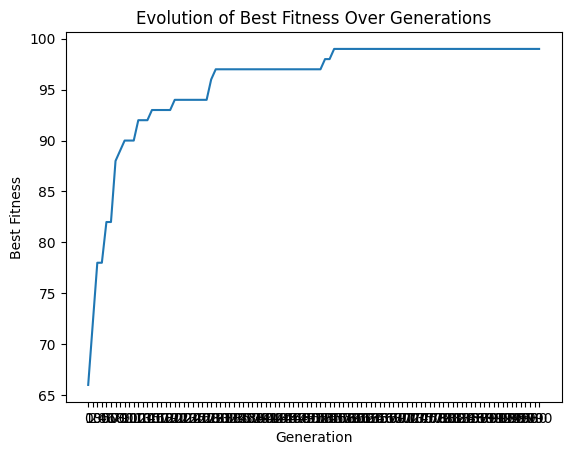

In [61]:
plt.plot(fitness_history)
plt.xlabel('Generation')
plt.xticks(ticks=range(0, len(fitness_history), 1),
           labels=[str(i * 10) for i in range(len(fitness_history))])
plt.ylabel('Best Fitness')
plt.title('Evolution of Best Fitness Over Generations')
plt.show()

# 2. Sử dụng thư viện

In [62]:
# Homework
from openseespy.opensees import *
def analysis_truss(b1, h1, b2, h2, b3, h3):
    s1 = b1*h1
    s2 = b2*h2
    s3 = b3*h3
    # ------------------------------
    # Start of model generation
    # -----------------------------

    # remove existing model
    wipe()

    # set modelbuilder
    model('basic', '-ndm', 2, '-ndf', 2)

    # create nodes
    node(1, 0.0, 0.0)
    node(2, 144.0,  0.0)
    node(3, 168.0,  0.0)
    node(4,  72.0, 96.0)

    # set boundary condition
    fix(1, 1, 1)
    fix(2, 1, 1)
    fix(3, 1, 1)

    # define materials
    uniaxialMaterial("Elastic", 1, 3000.0)

    # define elements
    element("Truss",1,1,4,s1,1)
    element("Truss",2,2,4,s2,1)
    element("Truss",3,3,4,s3,1)

    # create TimeSeries
    timeSeries("Linear", 1)

    # create a plain load pattern
    pattern("Plain", 1, 1)

    # Create the nodal load - command: load nodeID xForce yForce
    load(4, 100.0, -50.0)

    # ------------------------------
    # Start of analysis generation
    # ------------------------------

    # create SOE
    system("BandSPD")

    # create DOF number
    numberer("RCM")

    # create constraint handler
    constraints("Plain")

    # create integrator
    integrator("LoadControl", 1.0)

    # create algorithm
    algorithm("Linear")

    # create analysis object
    analysis("Static")

    # perform the analysis
    analyze(1)
    force_1 = abs(basicForce(1)[0])  # Element 1
    force_2 = abs(basicForce(2)[0])  # Element 1
    force_3 = abs(basicForce(3)[0])  # Element 1
    weight1 = 490*(s1/144)*10
    weight2 = 490*(s2/144)*10
    weight3 = 490*(s1/144)*11.3
    weight_all = round(weight1+weight2+weight3,2)
    return round(force_1/s1, 2), round(force_2/s2, 2), round(force_3/s3, 2), weight_all


In [63]:
analysis_truss(5, 5 ,5,5,5,5)

(1.75, 2.24, 2.27, 2662.67)

In [64]:
from mealpy import FloatVar, GA

In [65]:
def optimize_function(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    x5 = x[4]
    x6 = x[5]
    stress1, stress2, stress3, weight = analysis_truss(x1, x2, x3, x4, x5, x6)
    loss = (36-stress1)**2 + (36-stress2)**2 + (36-stress3)**2
    return loss

In [70]:
lb = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
ub = [5, 5, 5, 5, 5, 5]
pop = 100
epoch = 1000

problem_dict = {
    "obj_func": optimize_function,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {
    "max_early_stop": 100  # after 10 epochs, if the global best doesn't improve then we stop the program
}



In [71]:
import numpy as np
import pandas as pd
optimizer = GA.BaseGA(epoch=epoch, pop_size=pop, pc=0.95, pm=0.025)
optimizer.solve(problem_dict, termination=term_dict)
print(optimizer.g_best.solution)
print(optimizer.g_best.target.fitness)
best_solution = np.array(optimizer.g_best.solution)
np.savetxt('Lesson3_folder/best_solution.csv', best_solution, delimiter=',', comments='')

# optimizer.history.save_trajectory_chart(list_agent_idx=[3, 5], selected_dimensions=[1, 3], filename="tc")

# print(optimizer.history.list_global_best)
# print(optimizer.history.list_current_best)
# print(optimizer.history.list_global_worst)
# print(optimizer.history.list_current_worst)
# print(optimizer.history.list_epoch_time)
# print(optimizer.history.list_global_best_fit)
# print(optimizer.history.list_current_best_fit)
# print(optimizer.history.list_diversity)
# print(optimizer.history.list_exploitation)
# print(optimizer.history.list_exploration)
# print(optimizer.history.list_population)

pd.DataFrame(optimizer.history.list_global_best).to_csv('Lesson3_folder/list_global_best.csv')
pd.DataFrame(optimizer.history.list_current_best).to_csv('Lesson3_folder/list_current_best.csv')
pd.DataFrame(optimizer.history.list_global_worst).to_csv('Lesson3_folder/list_global_worst.csv')
pd.DataFrame(optimizer.history.list_current_worst).to_csv('Lesson3_folder/list_current_worst.csv')
pd.DataFrame(optimizer.history.list_epoch_time).to_csv('Lesson3_folder/list_epoch_time.csv')
pd.DataFrame(optimizer.history.list_global_best_fit).to_csv('Lesson3_folder/list_global_best_fit.csv')
pd.DataFrame(optimizer.history.list_current_best_fit).to_csv('Lesson3_folder/list_current_best_fit.csv')
pd.DataFrame(optimizer.history.list_diversity).to_csv('Lesson3_folder/list_diversity.csv')
pd.DataFrame(optimizer.history.list_exploitation).to_csv('Lesson3_folder/list_exploitation.csv')
pd.DataFrame(optimizer.history.list_exploration).to_csv('Lesson3_folder/list_exploration.csv')
pd.DataFrame(optimizer.history.list_population).to_csv('Lesson3_folder/list_population.csv')

2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 17.704099999999993, Global best: 17.704099999999993, Runtime: 0.01045 seconds
2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 15.442400000000012, Global best: 15.442400000000012, Runtime: 0.00919 seconds
2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 1.542100000000002, Global best: 1.542100000000002, Runtime: 0.00994 seconds
2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 1.542100000000002, Global best: 1.542100000000002, Runtime: 0.00942 seconds
2025/02/02 10:05:43 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 1.542100000000002, Global best: 1.54210000000000

[1.28877161 1.05848569 1.35225897 1.95773016 1.35710726 0.41668583]
1.222200000000004


In [72]:
print(analysis_truss(np.round(best_solution[0], 1),
                     np.round(best_solution[1], 1),
                     np.round(best_solution[2], 1),
                     np.round(best_solution[3], 1),
                     np.round(best_solution[4], 1),
                     np.round(best_solution[5], 1)))

(34.39, 33.67, 35.17, 198.92)


In [69]:
# Xét đến điều kiện trọng lượng
def optimize_function_2(x):
    x1 = round(x[0], 1)
    x2 = round(x[1], 1)
    x3 = round(x[2], 1)
    x4 = round(x[3], 1)
    x5 = round(x[4], 1)
    x6 = round(x[5], 1)
    stress1, stress2, stress3, weight = analysis_truss(x1, x2, x3, x4, x5, x6)
    if max(stress1, stress2, stress3) > 36:
        loss = 100
        return loss
    else:
        loss = (1-stress1/36)**2 + (1-stress2/36)**2 + (1-stress3/36)**2 + (weight/2662.67)
        return loss
lb = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
ub = [5, 5, 5, 5, 5, 5]
pop = 100
epoch = 1000

problem_dict = {
    "obj_func": optimize_function_2,
    "bounds": FloatVar(lb=lb, ub=ub),
    "minmax": "min",
    "save_population": True
}

term_dict = {
    "max_early_stop": 500  # after 10 epochs, if the global best doesn't improve then we stop the program
}

import numpy as np
import pandas as pd
optimizer = GA.BaseGA(epoch=epoch, pop_size=pop, pc=0.95, pm=0.025)
optimizer.solve(problem_dict, termination=term_dict)
print(optimizer.g_best.solution)
print(optimizer.g_best.target.fitness)
best_solution = np.array(optimizer.g_best.solution)
print(analysis_truss(np.round(best_solution[0], 1),
                     np.round(best_solution[1], 1),
                     np.round(best_solution[2], 1),
                     np.round(best_solution[3], 1),
                     np.round(best_solution[4], 1),
                     np.round(best_solution[5], 1)))

2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: Solving single objective optimization problem.
2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 1, Current best: 0.10291151181177699, Global best: 0.10291151181177699, Runtime: 0.01124 seconds
2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 2, Current best: 0.059411730770728734, Global best: 0.059411730770728734, Runtime: 0.01320 seconds
2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 3, Current best: 0.059411730770728734, Global best: 0.059411730770728734, Runtime: 0.01146 seconds
2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 4, Current best: 0.059411730770728734, Global best: 0.059411730770728734, Runtime: 0.01199 seconds
2025/02/02 10:04:24 PM, INFO, mealpy.evolutionary_based.GA.BaseGA: >>>Problem: P, Epoch: 5, Current best: 0.059411730770728734, Global b

[0.39816317 3.02243228 0.68258178 0.82930602 1.6036035  1.57549323]
0.05253404890521797
(32.09, 34.91, 36.0, 106.03)
